# DELEARN

In [1]:
import matplotlib.pyplot as plt

import torch as tt

import delearn as dl
from delearn import Task, Modular
from delearn import nn, oo

dtype=tt.float32

delearn.0.0.1


## define a module

In [2]:
# module holds parameters
module = dl.nn.MLP.parameters(
    input_size=1,
    layer_sizes=[64,64,64],
    output_size=1,
    dtype=dtype, 
    device=None, 
    requires_grad=True,
)
print(f'module: {module.keys()}')

module: dict_keys(['w.0', 'b.0', 'w.1', 'b.1', 'w.2', 'b.2', 'w.3', 'b.3'])


In [3]:
# initialize random weights
dl.Modular.rand(module)
dl.Modular.show(module, False) #<-- use True to see weights

#[0 :: w.0]	Shape[torch.Size([1, 64])]	Params: 64	Trainable: True
#[1 :: b.0]	Shape[torch.Size([1, 64])]	Params: 64	Trainable: True
#[2 :: w.1]	Shape[torch.Size([64, 64])]	Params: 4096	Trainable: True
#[3 :: b.1]	Shape[torch.Size([1, 64])]	Params: 64	Trainable: True
#[4 :: w.2]	Shape[torch.Size([64, 64])]	Params: 4096	Trainable: True
#[5 :: b.2]	Shape[torch.Size([1, 64])]	Params: 64	Trainable: True
#[6 :: w.3]	Shape[torch.Size([64, 1])]	Params: 64	Trainable: True
#[7 :: b.3]	Shape[torch.Size([1, 1])]	Params: 1	Trainable: True

Total Parameters: 8513	Trainable: 8513	Frozen: 0


## define forward function

In [4]:
activations_list = (tt.sigmoid, tt.tanh, tt.relu, dl.Identity)
def forward(m, x): return dl.nn.MLP.forward(m,x,activations_list)

## define a dataset

Training set: 50
Validation set: 50


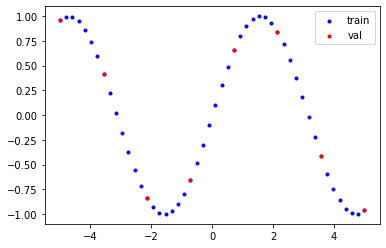

In [5]:
# training set
tx = tt.linspace(-5, 5, 50, dtype=dtype)
ty = tt.sin(tx)
tds = dl.Task( tx.unsqueeze(-1), ty.unsqueeze(-1), )(batch_size=10, shuffle=True, drop_last=False) # <--- traing loader
print('Training set:', len(tds))

# validation set
vx = tt.linspace(-5, 5, 8, dtype=dtype)
vy = tt.sin(vx)
vds = dl.Task( vx.unsqueeze(-1), vy.unsqueeze(-1), )
print('Validation set:', len(tds))

# visualize
plt.figure()
plt.scatter(tds.x,tds.y, color='blue', marker='.', label='train')
plt.scatter(vds.x,vds.y, color='red', marker='.', label='val')
plt.legend()
plt.show()


In [6]:
lossf = tt.nn.MSELoss()

In [7]:
optimf = dl.oo.Adam().build(module.values())

In [8]:
callback = dl.TrainingCallback(
    val_data=(vds.x,vds.y), forward=forward, lossf=lossf)


In [9]:

def valplot(m):
    txx, tyy = tds.x, tds.y
    vxx, vyy =  vds.x, vds.y
    tloss, tpp = dl.Trainer.predict_batch(txx, tyy, forward, m, lossf)
    vloss, vpp = dl.Trainer.predict_batch(vxx, vyy, forward, m, lossf)

    plt.figure()
    plt.scatter(txx,tyy, color='blue', marker='.', label='train')
    plt.scatter(vxx,vyy, color='red', marker='.', label='val')

    plt.scatter(txx,tpp, color='blue', marker='x')
    plt.scatter(vxx,vpp, color='red', marker='x')

    plt.show()
    print(tloss)
    print(vloss)
    

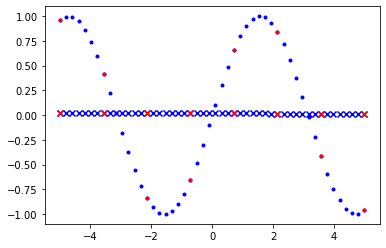

0.5342151522636414
0.5563672780990601


In [10]:
valplot(module)

100%|██████████| 150/150 [00:01<00:00, 79.35it/s] 


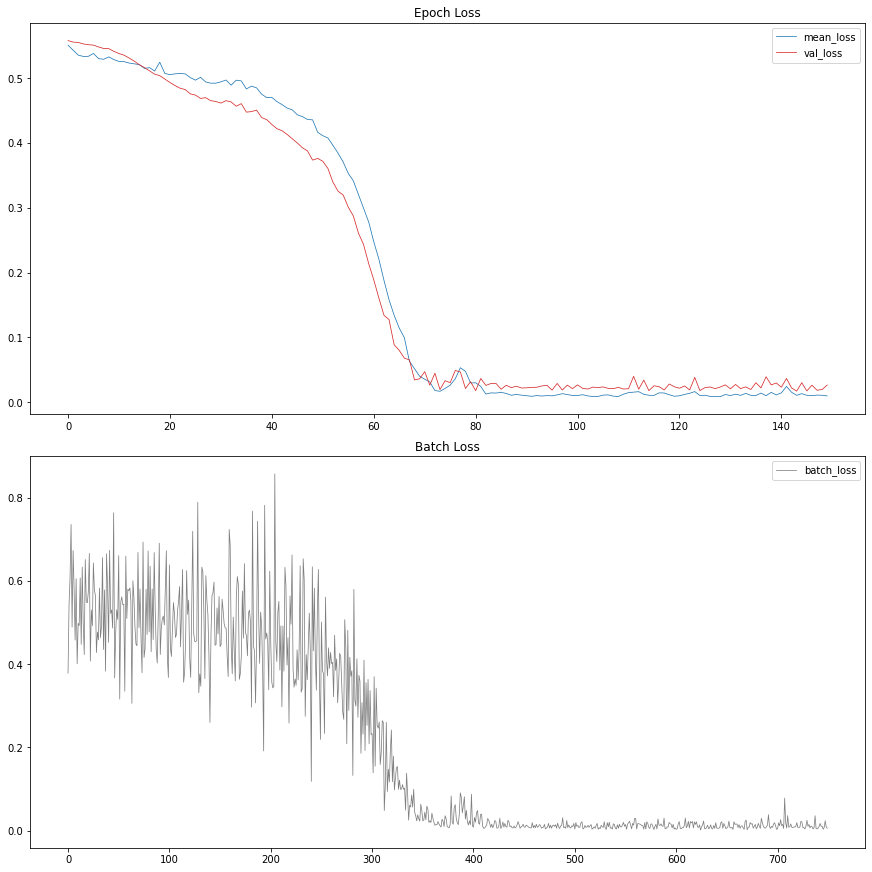

In [11]:

dl.Trainer.train_dataset(
    forward=forward,
    module=module,
    lossf=lossf,
    optimf=optimf,
    dataf = lambda e: tds,
    n=150,
    batch_mode=False,
    create_graph=False,
    callback=callback,
)
callback.plot_results()

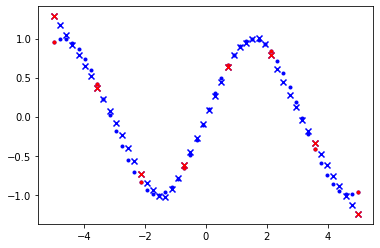

0.009103383868932724
0.026542922481894493


In [12]:
valplot(module)


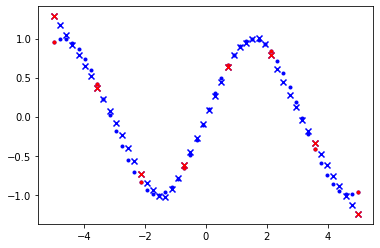

0.009103383868932724
0.026542922481894493


In [13]:
valplot(callback.module)